# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [31]:
# импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

Прочитаем исходные данные:

In [32]:
data = pd.read_csv('data/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

In [33]:
# выведем основную информацию о данных, наличие пропусков, выбросов, дисперсию и т.д.
print('Наличие пропусков, тип значений признаков: \n')
data.info()
print('\n')
print(f'Количество дубликатов скважин: {data.duplicated().sum()}')
print('\n')
print('Клоличество выбросов, дисперсия, минимумы и максимумы и т.д.:')
data.describe()

Наличие пропусков, тип значений признаков: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Well     200 non-null    int64  
 1   Por      200 non-null    float64
 2   Perm     200 non-null    float64
 3   AI       200 non-null    float64
 4   Brittle  200 non-null    float64
 5   TOC      200 non-null    float64
 6   VR       200 non-null    float64
 7   Prod     200 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


Количество дубликатов скважин: 0


Клоличество выбросов, дисперсия, минимумы и максимумы и т.д.:


,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,14.991150,4.330750,2.968850,48.161950,0.990450,1.964300,4311.219852
std,57.879185,2.971176,1.731014,0.566885,14.129455,0.481588,0.300827,992.038414
min,1.000000,6.550000,1.130000,1.280000,10.940000,-0.190000,0.930000,2107.139414
25%,50.750000,12.912500,3.122500,2.547500,37.755000,0.617500,1.770000,3618.064513
50%,100.500000,15.070000,4.035000,2.955000,49.510000,1.030000,1.960000,4284.687348
75%,150.250000,17.402500,5.287500,3.345000,58.262500,1.350000,2.142500,5086.089761
max,200.000000,23.550000,9.870000,4.630000,84.330000,2.180000,2.870000,6662.622385


In [34]:
# выведем записи о скважинах с равными нулю и отрицательными 
# значениями общего органического углерода
data[data['TOC'] <= 0]

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
25,26,7.27,2.01,3.41,54.56,-0.04,1.68,2351.289487
42,43,10.14,3.78,4.26,61.89,-0.19,1.97,3098.436639
179,180,7.22,1.42,3.60,63.09,-0.03,1.67,2362.269336
197,198,12.12,2.27,3.52,57.07,-0.04,1.73,3409.575363


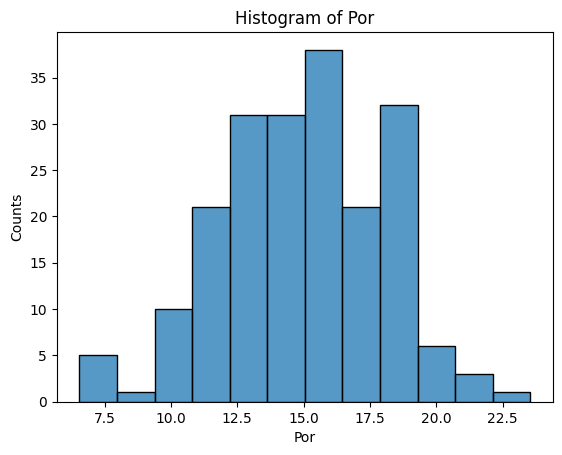

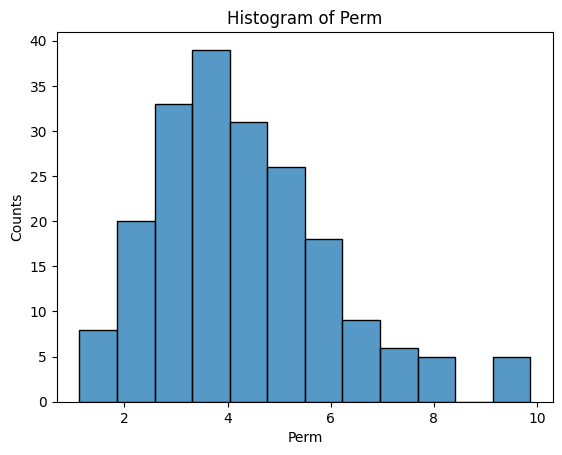

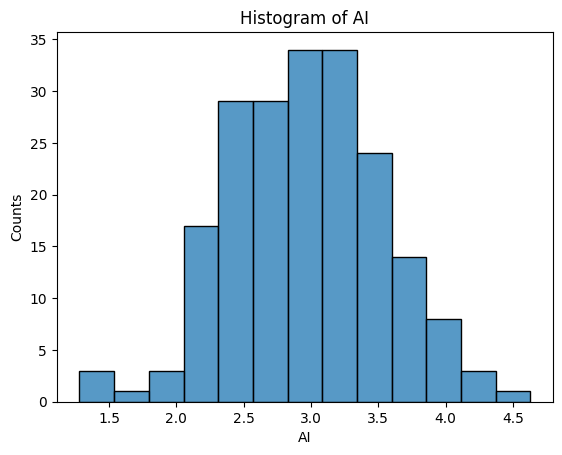

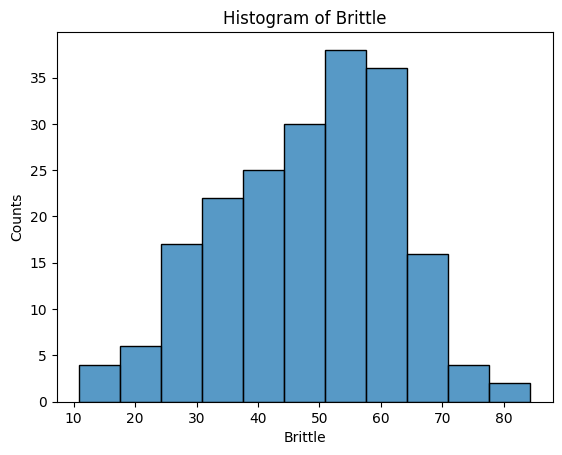

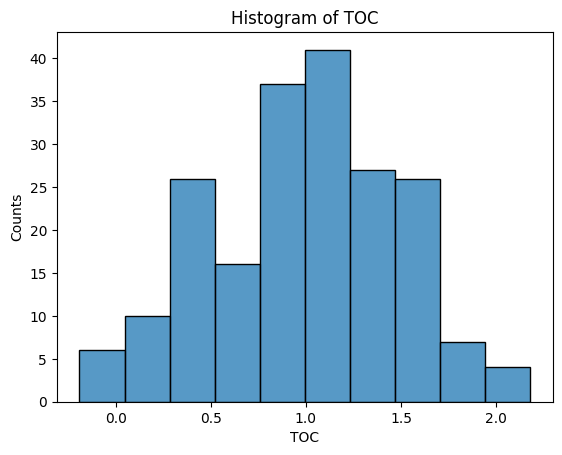

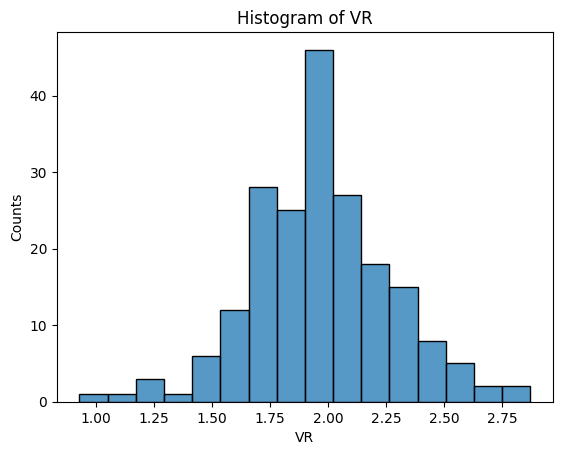

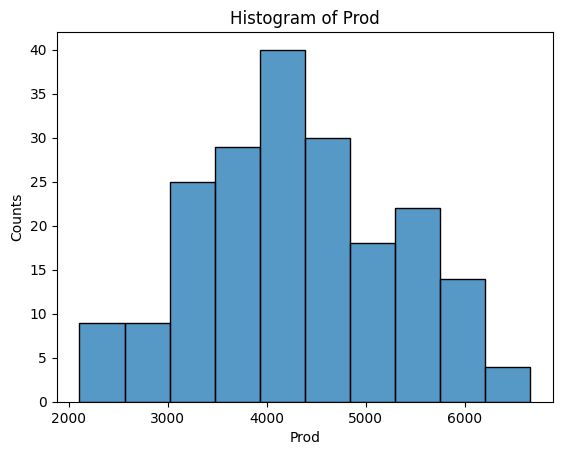

In [35]:
# постороим гистаграммы распределения всех признаков 
#(кроме порядкового номера скважины)

columns = ['Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR', 'Prod']

for i in range(7):
    sns.histplot(data=data, x=columns[i])
    plt.title(f'Histogram of {columns[i]}')
    plt.xlabel(columns[i])
    plt.ylabel('Counts')
    plt.show();

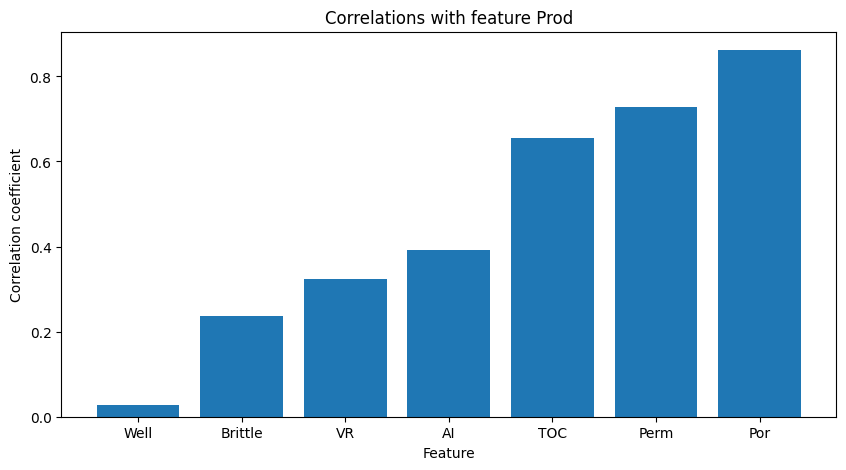

In [36]:
# построим диаграмму корреляции всех признаков с признаком Prod

# вычисляем модуль корреляции (корреляцию с признаком Prod всех признаков)
corr_with_prod = data.corr()['Prod'].abs().sort_values()
# удаляем корреляцию признака Prod с самим собой
corr_with_prod = corr_with_prod.drop('Prod')
# cтроим столбчатую диаграмму корреляций
fig, ax = plt.subplots(figsize=(10, 5)) # фигура + координатная плоскость
ax.bar(corr_with_prod.index, corr_with_prod.values) # столбчатая диаграмма
ax.set_title('Correlations with feature Prod') # название графика
ax.set_xlabel('Feature') # название оси x
ax.set_ylabel('Сorrelation coefficient'); # название оси y

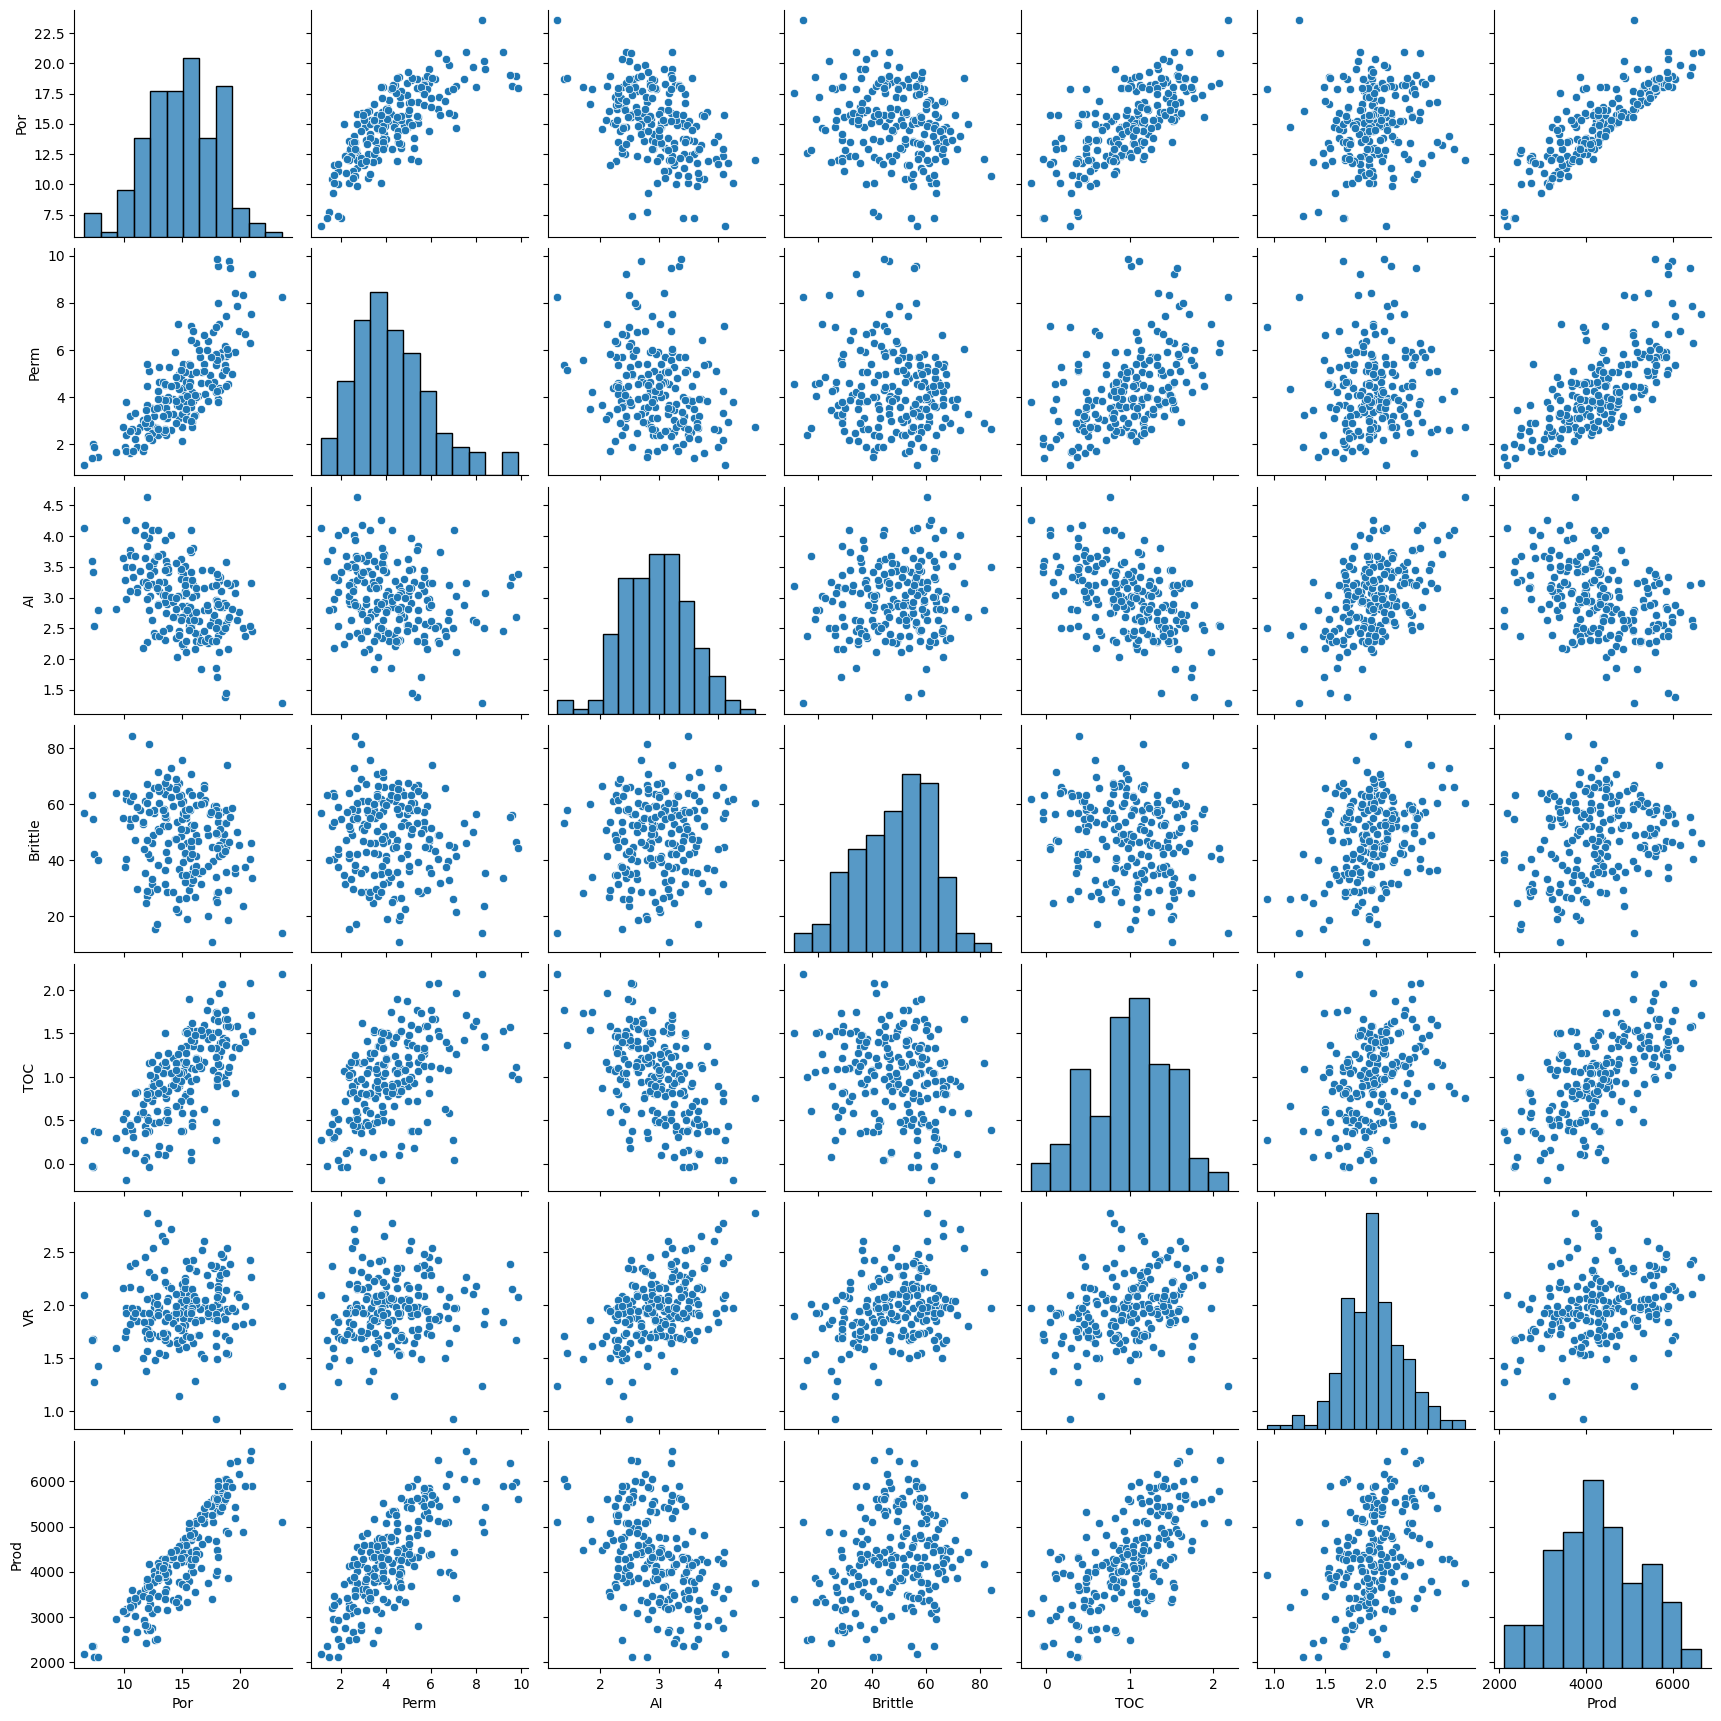

In [37]:
# постороим парные диаграммы сочетаний всех признаков
sns.pairplot(data.drop('Well', axis=1)) 
plt.show()

1. Распределение признаков можно считать нормальным, однако не идеальным. Присутствует ассимметрия (перекос) "колоколов" для некоторых признаков.
2. Возможны выбросы для признака Perm.
3. Возможно присутствуют выбросы для признака TOC - 4 скважины имеют отрицательные значения общего органического углерода.
4. Можно отметить сильную прямую зависимость целевой переменной Prod от факторов Por и Perm, а также от TOC (в меньшей степени).
5. Можно заметить взаимосвязь факторов Por - Perm и Por - TOC (прямую зависимость).

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

<Axes: >

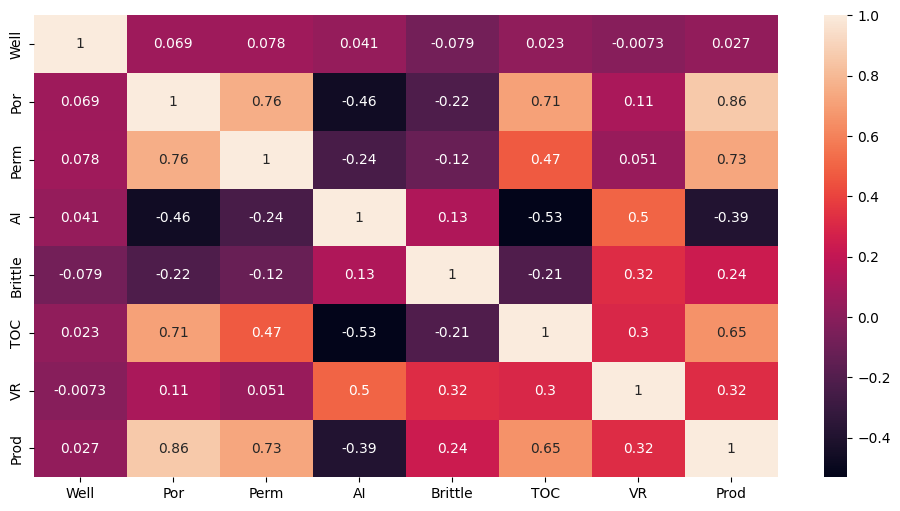

In [38]:
# построим корреляционную матрицу (метод Пирсона) 
corr_matr = data.corr()
# визуализируем ее с помощью тепловой карты
plt.figure(figsize = (12,6))
sns.heatmap(corr_matr, annot=True)

In [39]:
# вычислим ранг и определитель корреляционной матрицы
print(f'Ранг матрицы корреляции: {np.linalg.matrix_rank(corr_matr.values)}')
print(f'Определитель матрицы корреляции: {np.linalg.det(corr_matr.values)}')


Ранг матрицы корреляции: 8
Определитель матрицы корреляции: 0.0007299388072652095


1. С целевой переменной Prod сильнее всего коррелируют факторы Por и Perm: 0,86 и 0,73, соответственно. Также, можно отметить фактор TOC: 0,65.

2. Корреляционная матрица является плохо обусловленной, т.к. ее определитель близок к нулю (0.00073).
3. В данных присутствует мультиколлинеарность, т.к. корреляционная матрица близка к вырожденной. Сильная зависимость наблюдается для признаков Por, Perm и TOC.
4. В данном случае модель классической линейной регрессии по методу наименьших квадратов принципиально применима. Однако, т.к. корреляционная матрица (данные) близка к вырожденной (плохо обусловлены) - коэффициенты, полученные с помощью классического МНК сложно интерпретировать (модули их величин будет слишком велики).

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [40]:
# создадим матрицу регрессоров из имеющегося датафрейма 
# путем исключения столбца Prod, который будет вектором 
# правильных ответов. Также добавим интерсепт - столбец 
# с константой 1.
X = data.copy()
X.drop('Prod', axis=1, inplace=True)
ones = [1 for i in range(200)]
X.insert(0, 'Const', ones)
X = X.values
y=data['Prod'].values.reshape((200, 1))
display(X)
display(y)

array([[ 1.000e+00,  1.000e+00,  1.208e+01, ...,  8.140e+01,  1.160e+00,
         2.310e+00],
       [ 1.000e+00,  2.000e+00,  1.238e+01, ...,  4.617e+01,  8.900e-01,
         1.880e+00],
       [ 1.000e+00,  3.000e+00,  1.402e+01, ...,  7.280e+01,  8.900e-01,
         2.720e+00],
       ...,
       [ 1.000e+00,  1.980e+02,  1.212e+01, ...,  5.707e+01, -4.000e-02,
         1.730e+00],
       [ 1.000e+00,  1.990e+02,  1.555e+01, ...,  5.825e+01,  1.890e+00,
         2.350e+00],
       [ 1.000e+00,  2.000e+02,  2.089e+01, ...,  4.617e+01,  1.710e+00,
         2.270e+00]])

array([[4165.196191],
       [3561.146205],
       [4284.348574],
       [5098.680869],
       [3406.132832],
       [4395.763259],
       [4104.400989],
       [3496.742701],
       [4025.851153],
       [4285.026122],
       [4691.546305],
       [5128.20297 ],
       [5113.940775],
       [5546.431951],
       [4323.568513],
       [3539.984263],
       [5425.900608],
       [3796.037029],
       [4534.585915],
       [3803.411386],
       [5778.851488],
       [4771.307836],
       [2486.075498],
       [2515.440716],
       [6046.257538],
       [2351.289487],
       [4971.979256],
       [3999.613909],
       [2760.485982],
       [3825.661812],
       [5859.748328],
       [3775.981178],
       [3907.28923 ],
       [4118.233273],
       [3621.261108],
       [2718.652945],
       [3608.47473 ],
       [5249.625543],
       [4239.53187 ],
       [4471.241364],
       [4363.202854],
       [4495.004769],
       [3098.436639],
       [2677.297348],
       [5779.876876],
       [32

In [41]:
# вычислим значения коэффициентов, 
# используя матричную формулу МНК
w_hat = np.linalg.inv(X.T@X)@X.T@y
print(f'Коэффициенты: \n {np.round(w_hat)}')

Коэффициенты: 
 [[-1232.]
 [    0.]
 [  230.]
 [  116.]
 [ -365.]
 [   25.]
 [  -78.]
 [  785.]]


1. В данных есть признак, который, согласно модели, можно назвать неинформативным. Этот признак не оказывают влияния на целевую переменную, т.к. его коэффициент (округленный до целого) равен нулю. Соответственно его вклад в предсказание элементов (координат) вектора правильных ответов равен нулю (точнее близок к нулю, с учетом округления и величины остальных коэффициентов). Это признак Well. Согласно описания данных это порядковый номер скважины, который действительно ни никак не может влиять на объем добычи газа.

2. Интерпретация нескольких коэффициентов полученной модели линейной регрессии:
- пористость скважины Por (коэффициент 230) - добыча газа прямо зависит от пористости (отношение объема пустот в пространстве к общему объему породы).
- проницаемость скважины Perm (коэффициент 116) - добыча газа прямо зависит от проницаемости (способность породы пропускать сквозь себя флюид, т.е. в данном случае газ).

Оба утверждения действительно справедливы с точки зрения геологии.

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [42]:
# прогноз суточной выработки газа для скважины с указанными параметрами
new = np.array([1, 106, 15.32, 3.71, 3.29, 55.99, 1.35, 2.42])
pred_106 = new@w_hat
print(f'Прогноз для скважины 106: {round(pred_106[0])} миллионов кубических футов в день')

# абсолютная ошибка построенного прогноза для предложенной скважины, 
# если известно, что на этой скважине производится 4748.315024 
# миллионов кубических футов газа в день
print(f'Абсолютная ошибка прогноза ( от известной величины 4748.315024): {round(abs(4748.315024 - pred_106[0]))} миллионов кубических футов в день')

Прогноз для скважины 106: 4723 миллионов кубических футов в день
Абсолютная ошибка прогноза ( от известной величины 4748.315024): 25 миллионов кубических футов в день


In [43]:
# вычислим две метрики: MAE и MSE, построив  прогноз 
# выработки газа для всех скважин из обучающего набора
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


print(f'Средняя абсолютная ошибка MAE: {round(mean_absolute_error(y, X@w_hat))}')
print(f'Среднеквадратичная ошибка MSE : {round(mean_squared_error(y, X@w_hat))}')

Средняя абсолютная ошибка MAE: 154
Среднеквадратичная ошибка MSE : 39315


Использованы две метрики:

- Cредняя абсолютная ошибка (Mean Absolute Error). Рассчитывается как среднее абсолютных разностей между наблюдаемыми и предсказанными значениями. Является линейной оценкой, а это значит, что все ошибки в среднем взвешены одинаково.
- Среднеквадратичная ошибка (Mean Squared Error). Подчеркивает большие ошибки и используется для выбора модели, которая дает меньше именно больших ошибок. Большие значения ошибок становятся заметнее за счет квадратичной зависимости.

Построенная модель линейной регрессии по методу наименьших квадратов с использованием матричной формулой МНК и инструментарием библиотеки numpy по указанным метрикам показала следующие результаты:
- MAE: 154 единицы - средняя ошибка от фактического значения.
- MSE: 39315 единиц 2 (квадрат) - необходимо сравнивать с результатами других моделей по данной метрике.  Умозрительно можно сказать, что с учетом диапазона значений целевой переменной 2000 - 6600 единиц, большие ошибки достаточно невелики.

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

В модели присутствует фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции. Это фактор TOC. Согласно матрице корреляций зависимость между этим фактором и целевой переменной прямая (знак +). Однако в модели этот коэффициент со знаком минус, т.е. модель учитывает зависимость между данным фактором и целевой переменной как обратную.

Полученное противоречие результатов связано с тем, что данные плохо обусловлены. Вследствии мультиколлинеарности части признаков (линейной зависимости) - матрица Грама значений признаков включая признак-константу близка к вырожденной.

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [44]:
# удалим сильно коррелированные между собой факторы (значения выше 0.7),
# это Perm И TOC (Por оставляем, т.к. он имеет наибольшую корреляцию с 
# целевой переменной). Так же удаляем признак Well, как имеющий корреляцию
# с целевой переменной меньше 0.05.
# создадим новую матрицу признаков с интерсептом.
X = data.copy()
X.drop(['Prod', 'Well', 'Perm', 'TOC'], axis=1, inplace=True)
ones = [1 for i in range(200)]
X.insert(0, 'Const', ones)
X = X.values
display(X)

array([[ 1.  , 12.08,  2.8 , 81.4 ,  2.31],
       [ 1.  , 12.38,  3.22, 46.17,  1.88],
       [ 1.  , 14.02,  4.01, 72.8 ,  2.72],
       [ 1.  , 17.67,  2.63, 39.81,  1.88],
       [ 1.  , 17.52,  3.18, 10.94,  1.9 ],
       [ 1.  , 14.53,  2.69, 53.6 ,  1.67],
       [ 1.  , 13.49,  2.93, 63.71,  1.85],
       [ 1.  , 11.58,  3.25, 53.  ,  1.93],
       [ 1.  , 12.52,  2.43, 65.77,  1.98],
       [ 1.  , 13.25,  3.71, 66.2 ,  2.65],
       [ 1.  , 15.04,  2.22, 61.11,  1.77],
       [ 1.  , 16.19,  2.29, 49.1 ,  1.86],
       [ 1.  , 16.82,  2.8 , 66.65,  1.98],
       [ 1.  , 17.39,  2.55, 56.43,  2.19],
       [ 1.  , 13.83,  2.51, 66.22,  1.64],
       [ 1.  , 11.34,  3.43, 58.03,  2.15],
       [ 1.  , 19.55,  3.08, 35.49,  1.95],
       [ 1.  , 15.58,  2.53, 29.43,  1.88],
       [ 1.  , 14.73,  3.03, 67.42,  1.98],
       [ 1.  , 12.47,  3.54, 48.82,  2.54],
       [ 1.  , 18.08,  2.38, 53.56,  2.09],
       [ 1.  , 16.32,  2.41, 46.78,  1.72],
       [ 1.  , 12.62,  2.38, 15.

In [45]:
# вычислим значения коэффициентов, 
# используя матричную формулу МНК
w_hat = np.linalg.inv(X.T@X)@X.T@y
print(np.round(w_hat))

[[-1835.]
 [  293.]
 [ -200.]
 [   28.]
 [  517.]]


In [46]:
# вычислим две метрики: MAE и MSE, построив  прогноз 
# выработки газа для всех скважин из обучающего набора
print(f'Средняя абсолютная ошибка MAE: {round(mean_absolute_error(y, X@w_hat))}')
print(f'Среднеквадратичная ошибка MSE : {round(mean_squared_error(y, X@w_hat))}')

Средняя абсолютная ошибка MAE: 171
Среднеквадратичная ошибка MSE : 53661


Интерпретация полученных коэффициентов:
- пористость скважины Por - добыча газа прямо зависит от пористости (отношение объема пустот в пространстве к общему объему породы). Ранее коэффициент был равен 230, теперь (после удаления двух признаков) он вырос и стал 293.
- коэффициент хрупкости скважины Brittle -  добыча газа прямо зависит от пористости (отношение удельной энергии упругой деформации к величине удельной энергии разрушения пород при одноосном сжатии). Ранее коэффициент был равен 25, теперь (после удаления двух признаков) он вырос и стал 28.

Cредняя абсолютная ошибка MAE, т.е. средняя разница между  наблюдаемыми и предсказанными значениями, составляет 171 единицу. Значение данной метрики выросло: 171 против 154 единицы.
Среднеквадратичная ошибка MSE, т.е. средний квадрат разницы между  наблюдаемыми и предсказанными значениями, равен 53661 единица 2 (квадрат). Значение данной метрики выросло: 53661 против 39315 единиц 2.
Качество модели по сравнению предидущим вариантом ухудшилось, причем более значительно именно для больших ошибок (наибольшей разницы между  наблюдаемым и предсказанным значением).

Теперь нет противоречий между коэффициентами линейной регрессии и корреляции. Т.е. знаки соответствующих коэффициентов совпадают. Следует отметить, что признак TOC для коэффициентов которого ранее наблюдалось противоречие - исключен из рассмотрения как сильно коррелирующий с признаком Por.

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [48]:
# построим модель линейной регрессии из библиотеки 
from sklearn.linear_model import LinearRegression

# создадим объект класса линейная регрессия и обучим его,
# передав матрицу наблюдений (столбец интерсепта не создаем,
# т.к. он уже присутствует) и целевую переменную
lr = LinearRegression(fit_intercept=False).fit(X, y)

# выведем значения коэффициентов
print(f'Коэффициенты: \n {np.round(lr.coef_.T)}')

# сделаем прогноз выработки газа для всех скважин из обучающего набора
y_pred = lr.predict(X)

# вычислим две метрики: MAE и MSE 
print(f'Средняя абсолютная ошибка MAE: {round(mean_absolute_error(y, y_pred))}')
print(f'Среднеквадратичная ошибка MSE : {round(mean_squared_error(y, y_pred))}')


Коэффициенты: 
 [[-1835.]
 [  293.]
 [ -200.]
 [   28.]
 [  517.]]
Средняя абсолютная ошибка MAE: 171
Среднеквадратичная ошибка MSE : 53661


Результаты предсказания модели из библиотеки scikit-learn и "полученных вручную" (матричной формулы МНК и инструментарием библиотеки numpy) идентичны. Значения коэффициентов (округленных до целого) и выбранных метрик совпадают.

In [50]:
# построим ту же самую модель линейной регрессии с 
# использованием кросс-валидации (с идентичной обработкой 
# данных), для того, чтобы использовать в сравнении построенных моделей

from sklearn.model_selection import cross_validate

# создаём модель линейной регрессии, столбец интерсепта 
# не создаем, т.к. он уже присутствует
lr = LinearRegression(fit_intercept=False)

# оцениваем качество модели на кросс-валидации, метрика — MAE
cv_results = cross_validate(lr, X, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
print('MAE на тренировочных фолдах: {:.2f}'.format(-cv_results['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-cv_results['test_score'].mean()))
# оцениваем качество модели на кросс-валидации, метрика — MSE
cv_results = cross_validate(lr, X, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
print('MSE на тренировочных фолдах: {:.2f}'.format(-cv_results['train_score'].mean()))
print('MSE на валидационных фолдах: {:.2f}'.format(-cv_results['test_score'].mean()))

MAE на тренировочных фолдах: 170.50
MAE на валидационных фолдах: 179.02
MSE на тренировочных фолдах: 53121.08
MSE на валидационных фолдах: 58602.80


## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [51]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [53]:
# создадим матрицу признаков, исключив признаки Well (неинформативный), 
# Perm и TOC (мультиколлинеарные к Por) и Prod - целевая переменная,
# а также вектор правильных ответов (признак Prod)
X = data.copy()
X.drop(['Prod', 'Well', 'Perm', 'TOC'], axis=1, inplace=True)
X = X.values
y = data['Prod'].values.reshape((200, 1))

# стандартизируем матрицу признаков: 
# инициализируем стандартизатор StandardScaler
scaler = StandardScaler()
# подгоняем параметры стандартизатора (вычисляем среднее и СКО)
X_scaled = scaler.fit_transform(X)

# добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X_scaled_poly = poly.fit_transform(X_scaled)

print(f'Количество факторов после генерации полиномиальных признаков: {np.shape(X_scaled_poly)[1]}')

# создаём модель линейной регрессии
lr = LinearRegression()

# оцениваем качество модели на кросс-валидации, метрика — MAE
cv_results = cross_validate(lr, X_scaled_poly, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
print('MAE на тренировочных фолдах: {:.2f}'.format(-cv_results['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-cv_results['test_score'].mean()))
# оцениваем качество модели на кросс-валидации, метрика — MSE
cv_results = cross_validate(lr, X_scaled_poly, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
print('MSE на тренировочных фолдах: {:.2f}'.format(-cv_results['train_score'].mean()))
print('MSE на валидационных фолдах: {:.2f}'.format(-cv_results['test_score'].mean()))

Количество факторов после генерации полиномиальных признаков: 34
MAE на тренировочных фолдах: 75.35
MAE на валидационных фолдах: 110.47
MSE на тренировочных фолдах: 10162.07
MSE на валидационных фолдах: 24335.09


Значения выбранных метрик весьма существенно улучшились (улучшилось качество модели). Это связано с тем, что использована полиномиальная регрессия вместо линейной. Полиномиальная регрессия существенно лучше способна осуществлять предсказание.

Метрика MAE улучшилась с 171 до 75 единиц для тренировочной выборки (меньше - лучше). 

Метрика MSE улучшилась с 53661 до 10162 единиц 2 (квадрат) для тренировочной выборки (меньше - лучше).

Метрики MAE и MSE на обеих выборках показывают, что разброс для модели все еще довольно велик.

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

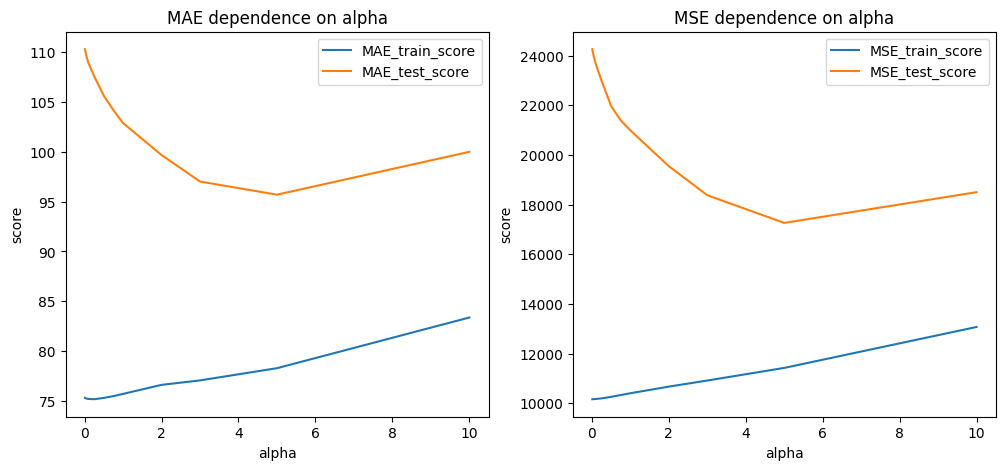

In [54]:
# список значений параметра alpha модели lasso
alpha_list = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1, 2, 3, 5, 10]
# словарь для заполнения значениями метрик
MAE_MSE_dict = {'MAE_train_score': [], 'MAE_test_score': [], 'MSE_train_score': [], 'MSE_test_score': []}

# цикл для получения списков значений метрик в зависимости 
# от значения параметра alpha
for a in alpha_list:
    # создаём модель линейной регрессии c L1-регуляризацией
    LS = Lasso(alpha=a, max_iter=10000, random_state=1)
    # оцениваем качество модели на кросс-валидации, метрика — MAE
    # и добавляем значения в словарь
    cv_MAE = cross_validate(LS, X_scaled_poly, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
    MAE_MSE_dict['MAE_train_score'].append(-cv_MAE['train_score'].mean())
    MAE_MSE_dict['MAE_test_score'].append(-cv_MAE['test_score'].mean())
    # оцениваем качество модели на кросс-валидации, метрика — MSE
    # и добавляем значения в словарь
    cv_MSE = cross_validate(LS, X_scaled_poly, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
    MAE_MSE_dict['MSE_train_score'].append(-cv_MSE['train_score'].mean())
    MAE_MSE_dict['MSE_test_score'].append(-cv_MSE['test_score'].mean())
    
# строим графики средних значений MAE и MSE для тренировочных и валидационных фолдов
# в зависимости от параметра alpha
plt.figure(figsize=(12, 5))
# графики значений MAE 
plt.subplot(1, 2, 1)
plt.plot(alpha_list, MAE_MSE_dict['MAE_train_score'], label='MAE_train_score')
plt.plot(alpha_list, MAE_MSE_dict['MAE_test_score'], label='MAE_test_score')
plt.title('MAE dependence on alpha')
plt.xlabel('alpha')
plt.ylabel('score')
plt.legend();
# графики значений MSE 
plt.subplot(1, 2, 2)
plt.plot(alpha_list, MAE_MSE_dict['MSE_train_score'], label='MSE_train_score')
plt.plot(alpha_list, MAE_MSE_dict['MSE_test_score'], label='MSE_test_score')
plt.title('MSE dependence on alpha')
plt.xlabel('alpha')
plt.ylabel('score')
plt.legend();

In [55]:
# создаём модель линейной регрессии c L1-регуляризацией
LS = Lasso(alpha=5, max_iter=10000, random_state=1)

# оцениваем качество модели на кросс-валидации, метрика — MAE
cv_results = cross_validate(LS, X_scaled_poly, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
print('MAE на тренировочных фолдах: {:.2f}'.format(-cv_results['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-cv_results['test_score'].mean()))
# оцениваем качество модели на кросс-валидации, метрика — MSE
cv_results = cross_validate(LS, X_scaled_poly, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
print('MSE на тренировочных фолдах: {:.2f}'.format(-cv_results['train_score'].mean()))
print('MSE на валидационных фолдах: {:.2f}'.format(-cv_results['test_score'].mean()))

MAE на тренировочных фолдах: 78.30
MAE на валидационных фолдах: 95.69
MSE на тренировочных фолдах: 11422.63
MSE на валидационных фолдах: 17260.89


1. Изменяя параметр alpha линейной регрессии с $L_1$-регуляризацией в пределах 0.01 - 10, найдено значение при котором используемые метрики на тестовых выборках принимают минимальные значения (точнее среднее значение метрик при использовании кросс-валидации с 5 фолдами). Это значение alpha = 5. Значения метрик для него - MAE: 78 и 96, MSE: 11422 и 17261, для тренировочной и тестовой выборок.

2. Полученные значения метрик лучше, чем полученные с использованием модели линейной регрессии без регуляризации (с идентичной обработкой данных). MAE: 96 против 110 единиц. MSE: 17261 против 24335 единиц 2 (квадрат) (меньше - лучше).

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [56]:
# для подбора гиперпараметров будем использовать optuna, 
# подбирать будем параметры, которые минимизируют 
# метрику MAE на валидационных фолдах
import optuna


# функция для вычисления значений метрики MAE на валидационных фолдах
def optuna_rg_MAE(trial):
  # задаем пространства поиска гиперпараметров
  alpha = trial.suggest_float('alpha', 0.01, 2.01, step=0.05)
  solver = trial.suggest_categorical('solver', ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'])
  
  # создаем модель линейной регрессии c L2-регуляризацией
  RG = Ridge(alpha=alpha, solver=solver, max_iter=10000, random_state=1)
  
  # используя кросс-валидацию обучаем модель с вычислением значения метрики MAE
  model = cross_validate(RG, X_scaled_poly, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
    
  # выводим среднее значение метрики MAE для валидационных фолдов
  return -model['test_score'].mean()


# cоздаем объект исследования, указывая, что необходима минимизация
study = optuna.create_study(study_name='RG_MAE_test', direction='minimize')
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rg_MAE, n_trials=1000)

# выводим  наилучшие значения искомых гиперпараметров
print(f'Наилучшие значения гиперпараметров для MAE (тестовые фолды): {study.best_params}')

[I 2023-07-15 05:10:28,906] A new study created in memory with name: RG_MAE_test
[I 2023-07-15 05:10:29,103] Trial 0 finished with value: 119.34975617178523 and parameters: {'alpha': 1.2100000000000002, 'solver': 'sag'}. Best is trial 0 with value: 119.34975617178523.
[I 2023-07-15 05:10:29,111] Trial 1 finished with value: 110.3080405367214 and parameters: {'alpha': 0.46, 'solver': 'cholesky'}. Best is trial 1 with value: 110.3080405367214.
[I 2023-07-15 05:10:29,118] Trial 2 finished with value: 114.50353273589641 and parameters: {'alpha': 1.86, 'solver': 'auto'}. Best is trial 1 with value: 110.3080405367214.
[I 2023-07-15 05:10:29,126] Trial 3 finished with value: 112.15478446027642 and parameters: {'alpha': 1.2100000000000002, 'solver': 'cholesky'}. Best is trial 1 with value: 110.3080405367214.
[I 2023-07-15 05:10:29,140] Trial 4 finished with value: 112.49950420475159 and parameters: {'alpha': 1.31, 'solver': 'lsqr'}. Best is trial 1 with value: 110.3080405367214.
[I 2023-07-15 

Наилучшие значения гиперпараметров для MAE (тестовые фолды): {'alpha': 0.26, 'solver': 'sparse_cg'}


In [57]:
# создаём модель линейной регрессии c L2-регуляризацией,
# используя лучшие параметры для MAE
RG = Ridge(**study.best_params, max_iter=10000)

# оцениваем качество модели на кросс-валидации, метрика — MAE
cv_results = cross_validate(RG, X_scaled_poly, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
print('MAE на тренировочных фолдах: {:.2f}'.format(-cv_results['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-cv_results['test_score'].mean()))
# оцениваем качество модели на кросс-валидации, метрика — MSE
cv_results = cross_validate(RG, X_scaled_poly, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
print('MSE на тренировочных фолдах: {:.2f}'.format(-cv_results['train_score'].mean()))
print('MSE на валидационных фолдах: {:.2f}'.format(-cv_results['test_score'].mean()))

MAE на тренировочных фолдах: 75.43
MAE на валидационных фолдах: 109.72
MSE на тренировочных фолдах: 10200.86
MSE на валидационных фолдах: 23818.86


Модель линейной регресии с $L_2$-регуляризацией показывает результат хуже, чем аналогичная модель с $L_1$-регуляризацией. А именно: 
MAE: 110 против 96 единиц. MSE: 23910 против 17261 единиц 2 (квадрат) (больше - хуже).

Модель линейной регресии с $L_2$-регуляризацией показывает результат аналогичный модели линейной регрессии без регуляризации (с идентичной обработкой данных).

Дополнительно, если подбирать гиперпараметры по минимизации значения метрики MSE вместо MAE, то результат для MSE несколько улучшится, но для MAE, соответственно, станет хуже (примерно 0.2 %).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [63]:
# для подбора гиперпараметров будем использовать optuna, 
# подбирать будем параметры, которые минимизируют 
# метрику MAE на валидационных фолдах
import optuna


# функция для вычисления значений метрики MAE на валидационных фолдах
def optuna_en_MAE(trial):
  # задаем пространства поиска гиперпараметров
  alpha = trial.suggest_float('alpha', 0.5, 5, step=0.5)
  l1_ratio = trial.suggest_float('l1_ratio', 0, 1, step=0.1)
  
  # создаем модель линейной регрессии c комбинацией L1 и L2 регуляризаций
  EN = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000, random_state=1)
  
  # используя кросс-валидацию обучаем модель с вычислением значения метрики MAE
  model = cross_validate(EN, X_scaled_poly, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
    
  # выводим среднее значение метрики MAE для валидационных фолдов
  return -model['test_score'].mean()


# cоздаем объект исследования, указывая, что необходима минимизация
study = optuna.create_study(study_name='EN_MAE_test', direction='minimize')
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_en_MAE, n_trials=1000)

# выводим  наилучшие значения искомых гиперпараметров
print(f'Наилучшие значения гиперпараметров для MAE (тестовые фолды): {study.best_params}')

[I 2023-07-15 05:17:20,312] A new study created in memory with name: EN_MAE_test
[I 2023-07-15 05:17:20,328] Trial 0 finished with value: 101.23519415863605 and parameters: {'alpha': 1.5, 'l1_ratio': 1.0}. Best is trial 0 with value: 101.23519415863605.
[I 2023-07-15 05:17:20,337] Trial 1 finished with value: 395.58036995673314 and parameters: {'alpha': 4.0, 'l1_ratio': 0.6000000000000001}. Best is trial 0 with value: 101.23519415863605.
[I 2023-07-15 05:17:20,349] Trial 2 finished with value: 172.3846211998288 and parameters: {'alpha': 0.5, 'l1_ratio': 0.8}. Best is trial 0 with value: 101.23519415863605.
[I 2023-07-15 05:17:20,359] Trial 3 finished with value: 335.31889448348466 and parameters: {'alpha': 4.0, 'l1_ratio': 0.8}. Best is trial 0 with value: 101.23519415863605.
[I 2023-07-15 05:17:20,370] Trial 4 finished with value: 417.8024316329753 and parameters: {'alpha': 3.0, 'l1_ratio': 0.30000000000000004}. Best is trial 0 with value: 101.23519415863605.
[I 2023-07-15 05:17:20,38

Наилучшие значения гиперпараметров для MAE (тестовые фолды): {'alpha': 4.5, 'l1_ratio': 1.0}


In [65]:
# создаём модель линейной регрессии c комбинацией L1 и L2 регуляризаций,
# используя лучшие параметры для MAE
EN = ElasticNet(**study.best_params, max_iter=10000, random_state=1)

# оцениваем качество модели на кросс-валидации, метрика — MAE
cv_results = cross_validate(EN, X_scaled_poly, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
print('MAE на тренировочных фолдах: {:.2f}'.format(-cv_results['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-cv_results['test_score'].mean()))
# оцениваем качество модели на кросс-валидации, метрика — MSE
cv_results = cross_validate(EN, X_scaled_poly, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
print('MSE на тренировочных фолдах: {:.2f}'.format(-cv_results['train_score'].mean()))
print('MSE на валидационных фолдах: {:.2f}'.format(-cv_results['test_score'].mean()))

MAE на тренировочных фолдах: 77.95
MAE на валидационных фолдах: 95.68
MSE на тренировочных фолдах: 11294.09
MSE на валидационных фолдах: 17379.99


In [66]:
# создаем модель линейной регрессии c комбинацией L1 и L2 регуляризаций,
# используя лучшие параметры для MAE
EN = ElasticNet(**study.best_params, max_iter=10000, random_state=1)

# оцениваем качество модели на кросс-валидации, метрика — MAPE
cv_results = cross_validate(EN, X_scaled_poly, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()*100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean()*100))
# минимальное и максимальное значение метрики MAPE на валидационных фолдах 
# (с учетом отрицательных значений берем наооборот)
print('Минимальное значение MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].max()*100))
print('Максимальное значение MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].min()*100))

MAPE на тренировочных фолдах: 1.82 %
MAPE на валидационных фолдах: 2.28 %
Минимальное значение MAPE на валидационных фолдах: 2.01 %
Максимальное значение MAPE на валидационных фолдах: 2.80 %


1. Лучшие параметры: alpha = 4.5, l1_ratio = 1. Следовательно вклад $L_2$-регуляризации равен 0 (нулю) (т.к. l1_ratio = 1). Т.е. модель линейной регрессии c комбинацией L1 и L2 регуляризаций фактически превращается в модель линейной регрессии c L1 регуляризацией. Разница в значениях  alpha (4.5 и 5) фактически не влияет на результат (сотые процента для метрики MAE).

2. Среднее значение метрики MAPE с использованием кросс-валидации, равно: 1.82 и 2.28 %. Т.е. предсказанное значение отличается от фактического в среднем на 2.28 % для валидационной выборки (это также среднее значение метрики MAPE). Максимально на 2.8 %.

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [67]:
results = pd.DataFrame({
    'model': ['LR', 'LR_poly', 'LR_poly_L1', 'LR_poly_L2', 'LR_poly_L1_L2'],
    'hyperparameters': ['', '', 'alpha=5', 'alpha=0.31, solver=sparse_cg', 'alpha=4.5, l1_ratio=1'],
    'poly_features': [False, True, True, True, True],
    'MAE_train': [171, 75, 78, 75, 78],
    'MAE_test': [179, 110, 96, 110, 96],
    'MSE_train': [53121, 10162, 11423, 10201, 11294],
    'MSE_test': [58603, 24335, 17261, 23819, 17380]    
})

results

,model,hyperparameters,poly_features,MAE_train,MAE_test,MSE_train,MSE_test
0,LR,,False,171,179,53121,58603
1,LR_poly,,True,75,110,10162,24335
2,LR_poly_L1,alpha=5,True,78,96,11423,17261
3,LR_poly_L2,"alpha=0.31, solver=sparse_cg",True,75,110,10201,23819
4,LR_poly_L1_L2,"alpha=4.5, l1_ratio=1",True,78,96,11294,17380


Среди пяти рассмотренных моделей две показали идентичный максимальный результат по метрике **MAE**. Это модели:
* LR_poly_L1 - **линейная регрессия с $L_1$ регуляризацией** 
* LR_poly_L1_L2 - **линейная регрессия с комбинацией $L_1$ и $L_2$ регуляризаций**.

Значение метрики MAE на валидационных фолдах равно 96 единиц. Разброс (переобученность) также одинаков (значение метрики MAE на тренировочных фолдах равно 78 единиц).

Однако по метрике **MSE** на валидационных фолдах модель LR_poly_L1 - **линейная регрессия с $L_1$ регуляризацией**, показала результат несколько лучше: 17261 против 17380 единиц 2 (квадрат). Также у нее несколько меньше разброс.

Таким образом модель LR_poly_L1 - **линейная регрессия с $L_1$ регуляризацией** показала наилучший результат.